# Correlation 

## Section 0 - Overview

This notebook starts with a overview of correlation and goes on to show different methods of calculating correlation coefficients.

### Types of correlation

* *Positive Correlation*: both variables change in the same direction.
* *Neutral Correlation*: No relationship in the change of the variables.
* *Negative Correlation*: variables change in opposite directions.


## Section 1 -  Variance and Covariance

### Variance

Measure of variablity or spread of data. Mathematically it is the average squared deviation from the mean score

$$var(x) = \frac{\sum(x_i - \overline{x})^2}{ N} $$

### Covariance

When variables are linearly correlated the relationship between those variables is known as covariance. In other words the extent to which the corresponding elements from the two datasets move in the same direction.

$$cov(X, Y) = (\sum (x-\overline{x}) \times (y - \overline{y})) \times \frac{1}{(n-1)}$$

The sign of the covariance tells us if they are positively or negatively correlated 


In [6]:
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot

In [7]:
# seed random number generator 
seed(1)

In [8]:
# prepare datasets
data1 = 20* randn(1000)+100
data2 = data1 + (10 * randn(1000) +50)

In [9]:
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


In [10]:
print("Mean of data1 %.2f" %std(data1))

Mean of data1 19.62


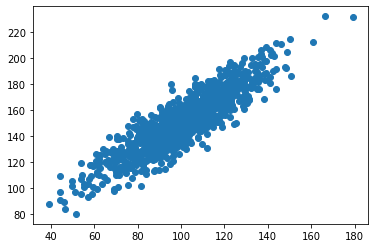

In [11]:
# plot
pyplot.scatter(data1,data2)
pyplot.show()

In [12]:
# Calculate the variance-covariance matrix
# cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)`
from numpy import cov
covariance = cov(data1,data2)
print (covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


**Interpretation**

The diagonal elements represent the variance, i.e. the variance of data1 = 385.333 and data2 = 500.380. 
The off-diagonal elements represent the covariance between data1 and data2, which is 389.754 also indicating a positive correlation between the datasets.

Since mean and standard deviation are used, the distribution is assumed to be a _**Gaussian (normal) distribution**_

## Section 2 - Pearsons Correlation

The pearsons correlation coefficient is calculated by dividing the covariance of two datasets by the product of the standard deviation of each dataset.

$$ r = \frac{cov(X,Y)}{\sigma X \times \sigma Y }$$

`Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))`

The coefficient returns a value between -1 and +1. The value 0 means there is no correlation.


In [14]:
from scipy.stats import pearsonr
corr,_ = pearsonr(data1, data2) #using a throwaway variable `_`
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


Since mean and standard deviation are used, the distribution is assumed to be a _**Gaussian (normal) distribution**_

## Section 3 - Spearman's Correlation

There are cases when the two variables are not linearly correlated or when the distrubution is non-Gaussion. In these cases we can use the Spearman's correlation. As with the Pearson correlation coefficient, the scores are between -1 and 1. 

Instead of calulating the covariance and standard deviation of the values of the dataset directly, we calculate on the relative rank of values on each sample. This is a common approach for non-parametric statistics, i.e. statistics where the distribution is not assumed to be Gaussian / normal

`Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))`

$$r = \frac{cov(rg_X,rg_Y)}{\sigma rg_X \times \sigma rg_Y }$$

_if you are unsure of the distribution of your dataset , Spearman's correlation is a good choice_




In [17]:
# calculate spearman's correlation
from scipy.stats import spearmanr
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.872
